## Build a Basic Neural Network

In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

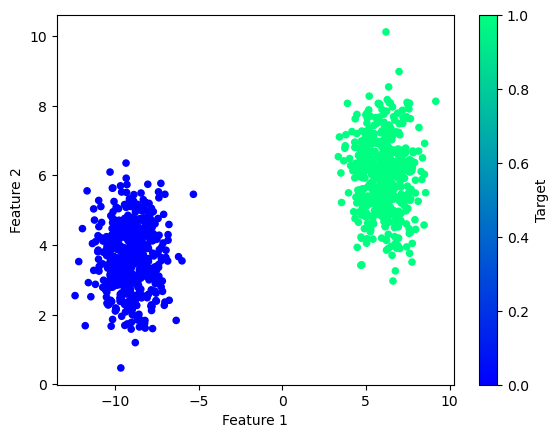

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## Train and Test a Basic Neural Network

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6758 - accuracy: 0.6267
Epoch 2/100
24/24 [==============================] - 0s 952us/step - loss: 0.6714 - accuracy: 0.6720
Epoch 3/100
24/24 [==============================] - 0s 913us/step - loss: 0.6662 - accuracy: 0.6987
Epoch 4/100
24/24 [==============================] - 0s 877us/step - loss: 0.6599 - accuracy: 0.7400
Epoch 5/100
24/24 [==============================] - 0s 853us/step - loss: 0.6524 - accuracy: 0.7667
Epoch 6/100
24/24 [==============================] - 0s 826us/step - loss: 0.6439 - accuracy: 0.7773
Epoch 7/100
24/24 [==============================] - 0s 917us/step - loss: 0.6337 - accuracy: 0.8027
Epoch 8/100
24/24 [==============================] - 0s 826us/step - loss: 0.6221 - accuracy: 0.8320
Epoch 9/100
24/24 [==============================] - 0s 783us/step - loss: 0.6090 - accuracy: 0.8587
Epoch 10/100
24/24 [==============================] - 0s 870us/step - loss: 0.5945 - accuracy

24/24 [==============================] - 0s 783us/step - loss: 0.0975 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 782us/step - loss: 0.0959 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 870us/step - loss: 0.0942 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 782us/step - loss: 0.0927 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 782us/step - loss: 0.0911 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 877us/step - loss: 0.0896 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 739us/step - loss: 0.0882 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 870us/step - loss: 0.0867 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 829us/step - loss: 0.0854 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 870us/step - loss: 0.0840 - accuracy: 

<AxesSubplot:>

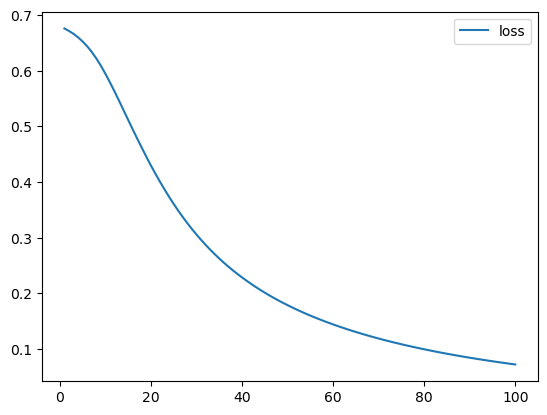

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

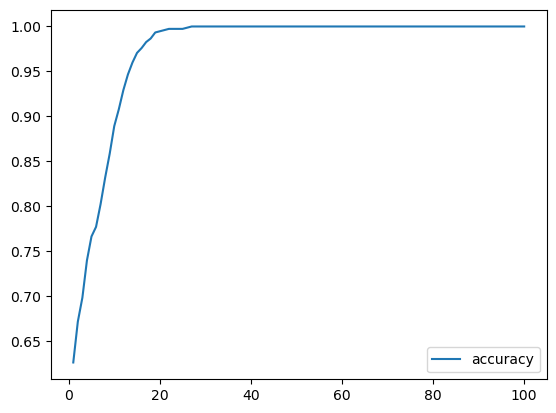

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0743 - accuracy: 1.0000 - 94ms/epoch - 12ms/step
Loss: 0.07434050738811493, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 48ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

## Nuances of Neural Networks on Nonlinear Numbers

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

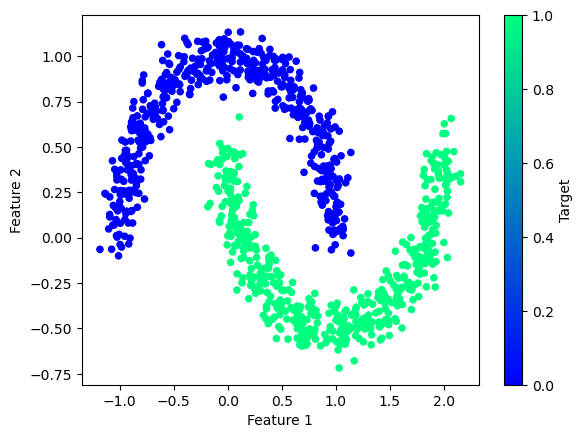

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.6773
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6374 - accuracy: 0.6867
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5944 - accuracy: 0.7027
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5624 - accuracy: 0.7080
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5371 - accuracy: 0.7173
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5169 - accuracy: 0.7240
Epoch 7/100
24/24 [==============================] - 0s 940us/step - loss: 0.4998 - accuracy: 0.7347
Epoch 8/100
24/24 [==============================] - 0s 840us/step - loss: 0.4853 - accuracy: 0.7387
Epoch 9/100
24/24 [==============================] - 0s 957us/step - loss: 0.4723 - accuracy: 0.7480
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.7573
Epo

24/24 [==============================] - 0s 921us/step - loss: 0.2624 - accuracy: 0.8853
Epoch 82/100
24/24 [==============================] - 0s 869us/step - loss: 0.2622 - accuracy: 0.8853
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2617 - accuracy: 0.8867
Epoch 84/100
24/24 [==============================] - 0s 869us/step - loss: 0.2613 - accuracy: 0.8880
Epoch 85/100
24/24 [==============================] - 0s 871us/step - loss: 0.2610 - accuracy: 0.8867
Epoch 86/100
24/24 [==============================] - 0s 913us/step - loss: 0.2607 - accuracy: 0.8880
Epoch 87/100
24/24 [==============================] - 0s 915us/step - loss: 0.2605 - accuracy: 0.8880
Epoch 88/100
24/24 [==============================] - 0s 912us/step - loss: 0.2602 - accuracy: 0.8880
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2599 - accuracy: 0.8880
Epoch 90/100
24/24 [==============================] - 0s 869us/step - loss: 0.2596 - accuracy: 0.88

<AxesSubplot:>

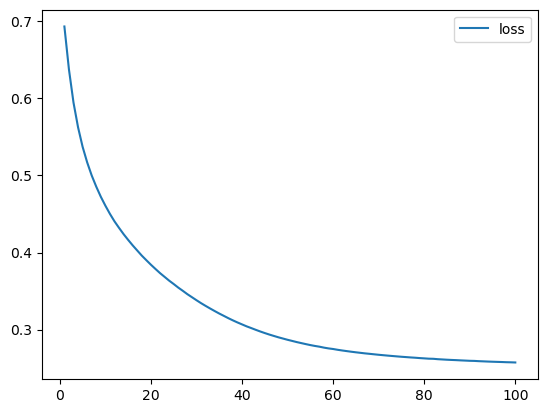

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

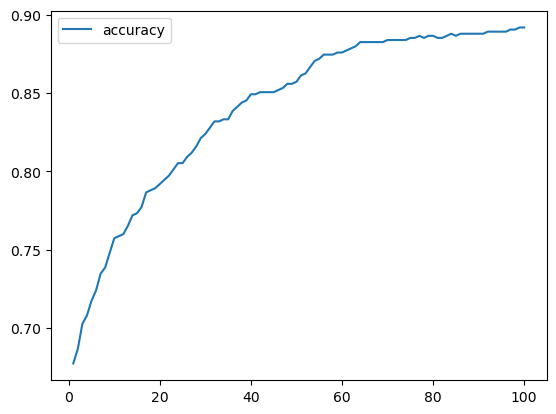

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Create the Connective Tissue, the Multiple Neuron Neural Network

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5275 - accuracy: 0.7800
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.8013
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4524 - accuracy: 0.8187
Epoch 4/100
24/24 [==============================] - 0s 928us/step - loss: 0.4249 - accuracy: 0.8413
Epoch 5/100
24/24 [==============================] - 0s 870us/step - loss: 0.4032 - accuracy: 0.8480
Epoch 6/100
24/24 [==============================] - 0s 784us/step - loss: 0.3851 - accuracy: 0.8600
Epoch 7/100
24/24 [==============================] - 0s 784us/step - loss: 0.3693 - accuracy: 0.8640
Epoch 8/100
24/24 [==============================] - 0s 784us/step - loss: 0.3556 - accuracy: 0.8707
Epoch 9/100
24/24 [==============================] - 0s 739us/step - loss: 0.3433 - accuracy: 0.8760
Epoch 10/100
24/24 [==============================] - 0s 871us/step - loss: 0.3325 - accuracy: 0.

24/24 [==============================] - 0s 891us/step - loss: 0.2408 - accuracy: 0.8947
Epoch 82/100
24/24 [==============================] - 0s 825us/step - loss: 0.2407 - accuracy: 0.8947
Epoch 83/100
24/24 [==============================] - 0s 869us/step - loss: 0.2404 - accuracy: 0.8947
Epoch 84/100
24/24 [==============================] - 0s 836us/step - loss: 0.2403 - accuracy: 0.8947
Epoch 85/100
24/24 [==============================] - 0s 851us/step - loss: 0.2403 - accuracy: 0.8960
Epoch 86/100
24/24 [==============================] - 0s 913us/step - loss: 0.2400 - accuracy: 0.8960
Epoch 87/100
24/24 [==============================] - 0s 913us/step - loss: 0.2399 - accuracy: 0.8947
Epoch 88/100
24/24 [==============================] - 0s 880us/step - loss: 0.2396 - accuracy: 0.8947
Epoch 89/100
24/24 [==============================] - 0s 913us/step - loss: 0.2395 - accuracy: 0.8973
Epoch 90/100
24/24 [==============================] - 0s 822us/step - loss: 0.2395 - accuracy: 